# Quantum Support Vector Regressor

Quantum Support Vector Regressor that extends the scikit-learn sklearn.svm.SVR regressor and introduces an additional quantum_kernel parameter.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms import QSVR
from qiskit_machine_learning.kernels import BaseKernel
from sklearn.svm import SVR
from qiskit.circuit import Parameter, QuantumCircuit

## Preparing data

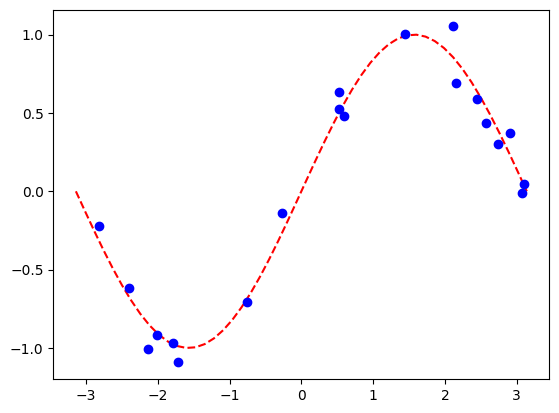

In [29]:
num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

In [41]:
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QuantumCircuit(1)
# qc.compose(feature_map, inplace=True)
# qc.compose(ansatz, inplace=True)

In [42]:
qsvr = QSVR()

In [43]:
qsvr.fit(X, y)

ValueError: The number of block qubits must be smaller or equal to the number of qubits in the circuit.